<a href="https://colab.research.google.com/github/faridelya/Deep-Learning/blob/main/Notebooks/GPT2_Fine_tune_for_Speechs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GPT2 Fine Tuning over Abraham Lincoln (Speechs 1861-65)
16th U.S. President

## Dependences

---
A simple Python package that wraps existing model fine-tuning and generation scripts for OpenAI GPT-2 text generation model(specifically the "small", 124M hyperparameter version). Additionally, this package allows easier generation of text, generating to a file for easy curation,allowing for prefixes to force the text to start with a given phrase.



In [ ]:
% tensorflow_version 1.x
!pip install gpt-2-simple  # installing model
import gpt_2_simple as gpt2      # package of gpt2 simple

In [ ]:
from datetime import datetime
from google.colab import files

## Downloading GPT-2

If you're retraining a model on new text, you need to download the GPT-2 model first. 

There are three released sizes of GPT-2:

* `124M` (default): the "small" model, 500MB on disk.
* `355M`: the "medium" model, 1.5GB on disk.
* `774M`: the "large" model, cannot currently be finetuned with Colaboratory but can be used to generate text from the pretrained model 
* `1558M`: the "extra large", true model. Will not work if a K80 GPU is attached to the notebook. (like `774M`, it cannot be finetuned).

Larger models have more knowledge, but take longer to finetune and longer to generate text. You can specify which base model to use by changing `model_name` in the cells below.

The next cell downloads it from Google Cloud Storage and saves it in the Colaboratory VM at `/models/<model_name>`.

This model isn't permanently saved in the Colaboratory VM; you'll have to redownload it if you want to retrain it at a later time.

In [ ]:
gpt2.download_gpt2(model_name="124M")   # model is saved into current directory under /models/124M/

Fetching checkpoint: 1.05Mit [00:00, 463Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 133Mit/s]                                                    
Fetching hparams.json: 1.05Mit [00:00, 635Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:03, 125Mit/s]                                   
Fetching model.ckpt.index: 1.05Mit [00:00, 303Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 125Mit/s]                                                 
Fetching vocab.bpe: 1.05Mit [00:00, 210Mit/s]                                                       


## Ulpoad Data

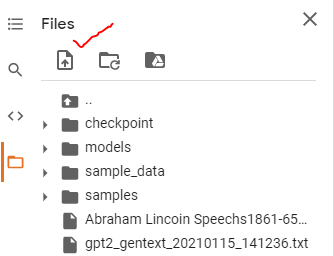

In [ ]:
Speechs = "Abraham Lincoin Speechs1861-65.txt"

## Finetune GPT-2

The next cell will start the actual finetuning of GPT-2. It creates a persistent TensorFlow session which stores the training config, then runs the training for the specified number of `steps`. (to have the finetuning run indefinitely, set `steps = -1`)

The model checkpoints will be saved in `/checkpoint/run1` by default. The checkpoints are saved every 500 steps (can be changed) and when the cell is stopped.

The training might time out after 4ish hours; make sure you end training and save the results so you don't lose them!

**IMPORTANT NOTE:** If you want to rerun this cell, **restart the VM first** (Runtime -> Restart Runtime). You will need to rerun imports but not recopy files.

Other optional-but-helpful parameters for `gpt2.finetune`:


*  **`restore_from`**: Set to `fresh` to start training from the base GPT-2, or set to `latest` to restart training from an existing checkpoint.
* **`sample_every`**: Number of steps to print example output
* **`print_every`**: Number of steps to print training progress.
* **`learning_rate`**:  Learning rate for the training. (default `1e-4`, can lower to `1e-5` if you have <1MB input data)
*  **`run_name`**: subfolder within `checkpoint` to save the model. This is useful if you want to work with multiple models (will also need to specify  `run_name` when loading the model)
* **`overwrite`**: Set to `True` if you want to continue finetuning an existing model (w/ `restore_from='latest'`) without creating duplicate copies. 

## Output Explanination


---
The absolute value of the loss is not important (the output text quality is subjective.but if the average loss stops decreasing, that’s a sign the model has converged and additional training may not help improve the model.







In [ ]:
import tensorflow as tf

tf.reset_default_graph()

sess = gpt2.start_tf_sess()
gpt2.finetune(sess,
              dataset = Speechs,
              model_name = "124M",
              steps =300,
              restore_from = "fresh",
              run_name= "run1",
              print_every=10,
              sample_every= 20,
              save_every=20
              )

Loading checkpoint models/124M/model.ckpt
INFO:tensorflow:Restoring parameters from models/124M/model.ckpt


  0%|          | 0/1 [00:00<?, ?it/s]

Loading dataset...


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


dataset has 207804 tokens
Training...
[10 | 29.95] loss=3.60 avg=3.60
[20 | 52.96] loss=3.17 avg=3.38
Saving checkpoint/run1/model-20
======== SAMPLE 1 ========
	 the user if they can not see me. And if they do see me, they may be able to see the person. No matter how close they are, I can't tell whom to look for, so let me know who I can ask. If they just go through a lot of information and there is no real information they can give them, they can just assume that I am there by themselves. I can then see who they can ask for. If they can't think of a way to get back to my lab, they can just assume that they can reach me at the lab. When I do come across him, I can assume that he has come from another world. If he isn't there, I can assume he is already there. I can just assume he is just one part of the whole human puzzle. And what I ask him is, did it not occur to you that you should ask me about him? And how I will respond to that question, because that is so essential if I don't un

## Generate Text From The Trained Model

After you've trained the model or loaded a retrained model from checkpoint, you can now generate text. `generate` generates a single text from the loaded model.

### Output Explanation
Speaking of generation, once you have a finetuned model, you can now generate custom text from it! By default, the gpt2.generate() function will generate as much text as possible (1,024 tokens) with a little bit of randomness. An important caveat: you will not get good generated text 100% of the time, even with a properly trained model (you can acheive at this satage but may took 25 tries to get good text!)

In [ ]:
gpt2.generate(sess, run_name = "run1")

We can also safely assume that the impossible might be averted. The facts are that the Union has gone into such a state of ruin that it can not go a step beyond its accustomed bounds; and that the Union itself has ceased to be a reliable and enduring arm of the Government. The country has become so divided and divided that it can not be able to repair to its former condition the whole expenditure of its annual revenues, which were derived from foreign nations only. All the resources of the country have ceased to be of use to the Government, while all its civil institutions have ceased to be of use to the people. The people have lost their confidence in the Government, and have demanded from the people the absolute removal of the Government. This demand has been made in large part by the disunionists, and has been made in large measure in the most extensive and extensive demonstrations. The people have also become angry, and have demanded the immediate abolition of the Government. This 



You can also pass in a `prefix` to the generate function to force the text to start with a given character sequence and generate text from there (good if you add an indicator when the text starts).

You can also generate multiple texts at a time by specifing `nsamples`. Unique to GPT-2, you can pass a `batch_size` to generate multiple samples in parallel, giving a massive speedup (in Colaboratory, set a maximum of 20 for `batch_size`).

Other optional-but-helpful parameters for `gpt2.generate` and friends:

*  **`length`**: Number of tokens to generate (default 1023, the maximum)
* **`temperature`**: The higher the temperature, the crazier the text (default 0.7, recommended to keep between 0.7 and 1.0)
* **`top_k`**: Limits the generated guesses to the top *k* guesses (default 0 which disables the behavior; if the generated output is super crazy, you may want to set `top_k=40`)
* **`top_p`**: Nucleus sampling: limits the generated guesses to a cumulative probability. (gets good results on a dataset with `top_p=0.9`)
* **`truncate`**: Truncates the input text until a given sequence, excluding that sequence (e.g. if `truncate='<|endoftext|>'`, the returned text will include everything before the first `<|endoftext|>`). It may be useful to combine this with a smaller `length` if the input texts are short.
*  **`include_prefix`**: If using `truncate` and `include_prefix=False`, the specified `prefix` will not be included in the returned text.

In [ ]:
prefix_gen = """Title: Advise for Americans
Date: Jan 13, 2021 2:30 am
Tags: Disagreement, Web/Tech
Number of comments: 23
People often like to believe that America is strong but be aware"""

gpt2.generate(sess,
              length=250,
              #prefix="harry potter was about to die",
              prefix = prefix_gen,
              nsamples=5,
              batch_size=5,
              top_k=40
              )

Title: Advise for Americans
Date: Jan 13, 2021 2:30 am
Tags: Disagreement, Web/Tech
Number of comments: 23
People often like to believe that America is strong but be aware that it is weak. This is not true. Our strength is in the people, not in the strength of our politicians. Our strength is in the people who control them. It is not in our politicians that we are weak. It is in the people who control us. The strength of our people is in their willingness to take the responsibilities of government down our throats and to take the chances of succeeding. In this respect, they are our greatest strength. They are the men who brought us to this country; they brought peace to the Middle East; and they have educated us to a high degree. They have given us the basis for the great scientific enterprise that we have sought to advance. They have given us the means by which to effect that great scientific enterprise. They have educated us to a high degree. They have given us the means of universal

### Create File for Text
For bulk generation, you can generate a large amount of text to a file and sort out the samples locally on your computer. The next cell will generate a generated text file with a unique timestamp.

You can rerun the cells as many times as you want for even more generated texts!

In [ ]:
gen_file = 'gpt2_gentext_{:%Y%m%d_%H%M%S}.txt'.format(datetime.utcnow())

gpt2.generate_to_file(sess,
                      destination_path=gen_file,
                      length=500,
                      temperature=0.7,
                      nsamples=100,
                      batch_size=20
                      )

In [ ]:
# may have to run twice to get file to download
files.download(gen_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>